9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 403ms/step


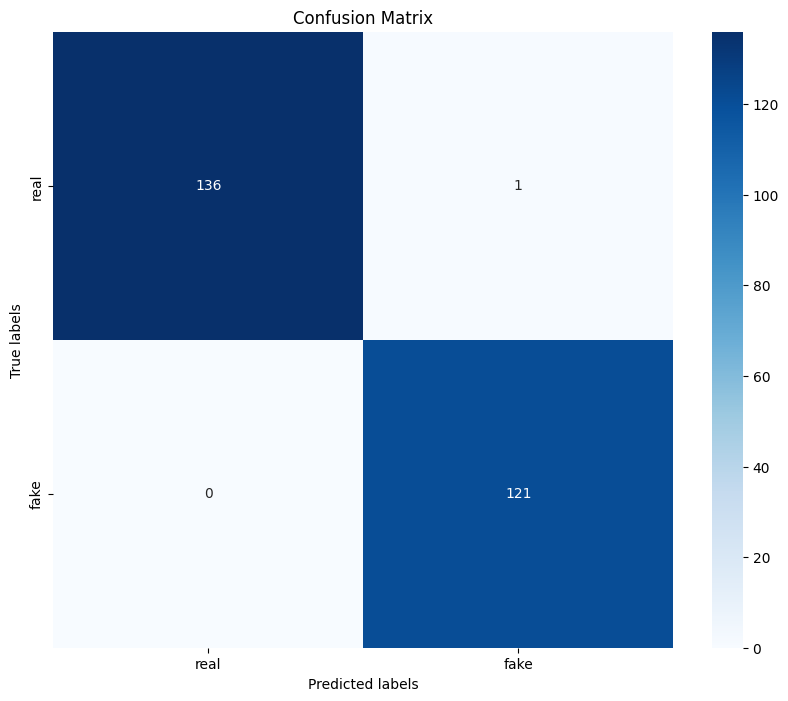

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix

# Rastgele tohumun belirlenmesi
import random
import tensorflow as tf
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Veri setini yükleme ve işleme adımları
data = pd.read_csv(r"Data1/data.csv")

# Resim boyutları
height, width = 224, 224

# Resimleri yükleme ve işleme
X = np.empty((data.shape[0], height, width, 3))
for i in range(data.shape[0]):
    img = load_img(r"Data1/{}/{}.jpg".format(data.loc[i, 'label'], data.loc[i, 'images_id']),
                   target_size=(height, width))
    # Piksel değerlerini [0, 1] aralığına normalleştirme
    img_array = img_to_array(img)
    img_array /= 255.0
    X[i] = img_array

# Etiketleri değiştirme
labels = data.label.unique()
labels = {labels[i]: i for i in range(labels.size)}
y = data.label.map(labels)

# One-hot encoding
y = to_categorical(y, len(labels))

# Veri setini train-test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

# Kaydedilen modeli yükleme
loaded_model = load_model("inceptionv3_model.keras")

# Test verisini tahmin etme
predictions = loaded_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Gerçek etiketler
true_labels = np.argmax(y_test, axis=1)

# Confusion matrix hesaplama
confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Confusion matrix görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g', cmap='Blues', xticklabels=labels.keys(), yticklabels=labels.keys())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
